In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyarrow
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import shap
sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [58]:
file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\Award_Batting_HOF_FE.feather'
eng_stats_df = pd.read_feather(file_path)

In [59]:
eng_stats_df.head(20)

,playerID,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,...,total_GIDP,max_HR,max_hits,max_SB,HOF_status,total_singles,batting_avg,OBP,SLG,OPS
1,aaronha01,23,3298.0,12364.0,2174.0,3771.0,1402.0,624.0,98.0,755.0,...,328.0,47.0,223.0,31.0,True,2294.0,0.304998,0.375781,0.435053,0.810834
25,abernte02,14,681.0,181.0,12.0,25.0,6.0,3.0,0.0,0.0,...,4.0,0.0,4.0,0.0,False,22.0,0.138122,0.165775,0.138122,0.303897
33,abreubo01,18,2425.0,8480.0,1453.0,2470.0,1476.0,574.0,59.0,288.0,...,165.0,31.0,183.0,40.0,False,1549.0,0.291274,0.396344,0.366156,0.762500
55,adairje01,13,1165.0,4019.0,378.0,1022.0,208.0,163.0,19.0,57.0,...,149.0,11.0,153.0,7.0,False,783.0,0.254292,0.290987,0.287385,0.578371
60,adamsba01,19,482.0,1019.0,79.0,216.0,53.0,31.0,15.0,3.0,...,0.0,1.0,33.0,1.0,False,167.0,0.211973,0.250933,0.232581,0.483514
64,adamsbo03,14,1281.0,4019.0,591.0,1082.0,414.0,188.0,49.0,37.0,...,62.0,8.0,180.0,16.0,False,808.0,0.269221,0.337469,0.299826,0.637295
88,adamssp01,13,1424.0,5557.0,844.0,1588.0,453.0,249.0,48.0,9.0,...,14.0,4.0,193.0,27.0,False,1282.0,0.285766,0.339601,0.297643,0.637243
93,adcocjo01,17,1959.0,6606.0,823.0,1832.0,594.0,295.0,35.0,336.0,...,223.0,38.0,168.0,3.0,False,1166.0,0.277324,0.336944,0.384348,0.721292
113,ageeto01,12,1129.0,3912.0,558.0,999.0,342.0,170.0,27.0,130.0,...,99.0,26.0,182.0,44.0,False,672.0,0.255368,0.315233,0.328732,0.643965
118,aguaylu01,10,568.0,1104.0,142.0,260.0,94.0,43.0,10.0,37.0,...,27.0,12.0,46.0,2.0,False,170.0,0.235507,0.295492,0.311594,0.607087


In [60]:
#X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]

X = eng_stats_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits',
    'max_SB', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS'
]].fillna(0)  # Replace NaNs with 0

# Ensure the target variable has no missing values
y = eng_stats_df['HOF_status']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model_1 = SVC(kernel='poly')
svm_model_1.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model_1.predict(X_test_scaled)

# Display performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nTotal Accuracy: {accuracy:.2f}%")

# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index)

# Identify false positives and false negatives
false_positives = y_test_reset[(y_test_reset == 0) & (y_pred_reset == 1)].index
false_negatives = y_test_reset[(y_test_reset == 1) & (y_pred_reset == 0)].index

# Extract player details for false positives and false negatives
false_positive_players = eng_stats_df.loc[false_positives, ['playerID', 'HOF_status']]
false_negative_players = eng_stats_df.loc[false_negatives, ['playerID', 'HOF_status']]

# Display the results
print("\nFalse Positives:")
print(false_positive_players)

print("\nFalse Negatives:")
print(false_negative_players)


Confusion Matrix:
[[530   4]
 [ 18  28]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       534
         1.0       0.88      0.61      0.72        46

    accuracy                           0.96       580
   macro avg       0.92      0.80      0.85       580
weighted avg       0.96      0.96      0.96       580


Total Accuracy: 96.21%

False Positives:
Empty DataFrame
Columns: [playerID, HOF_status]
Index: []

False Negatives:
Empty DataFrame
Columns: [playerID, HOF_status]
Index: []


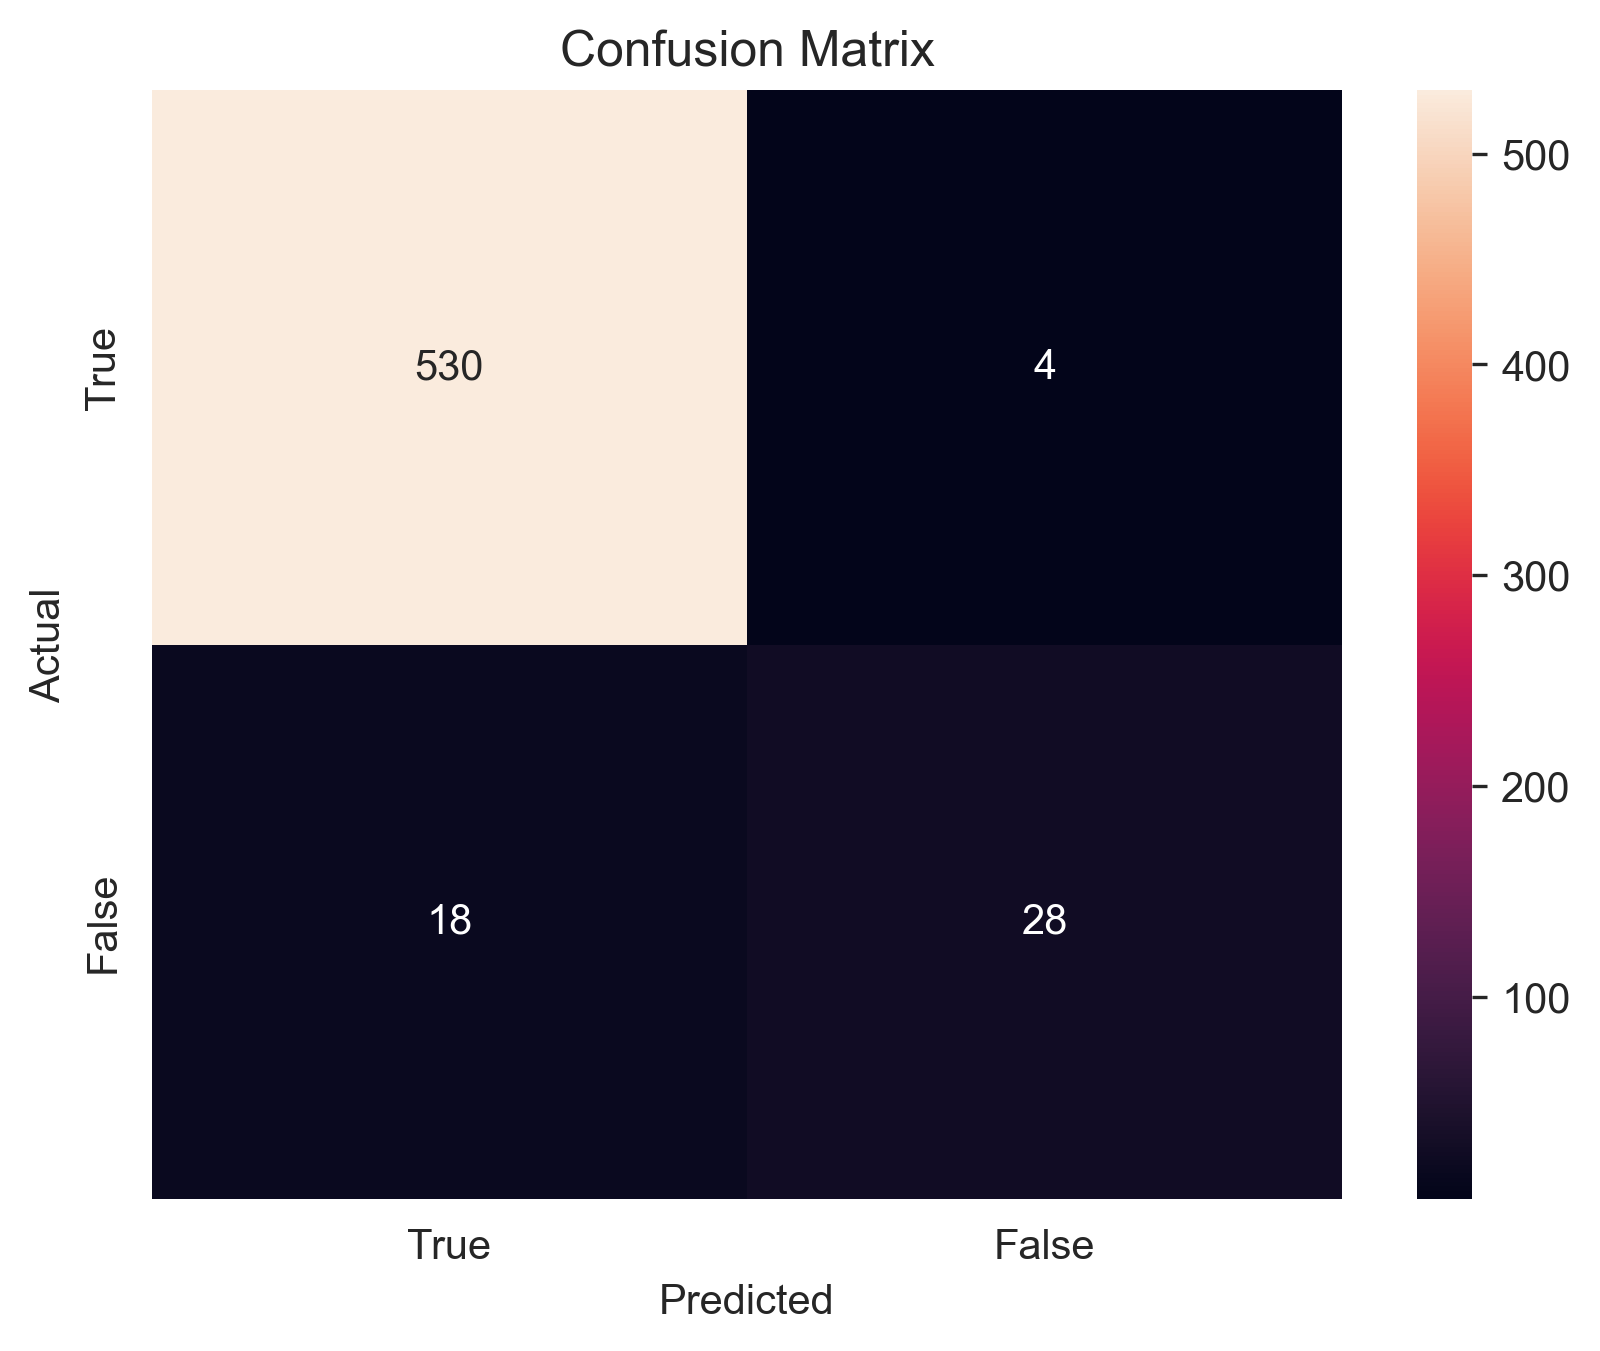

<Figure size 1920x1440 with 0 Axes>

In [61]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('svm_model_1.png')

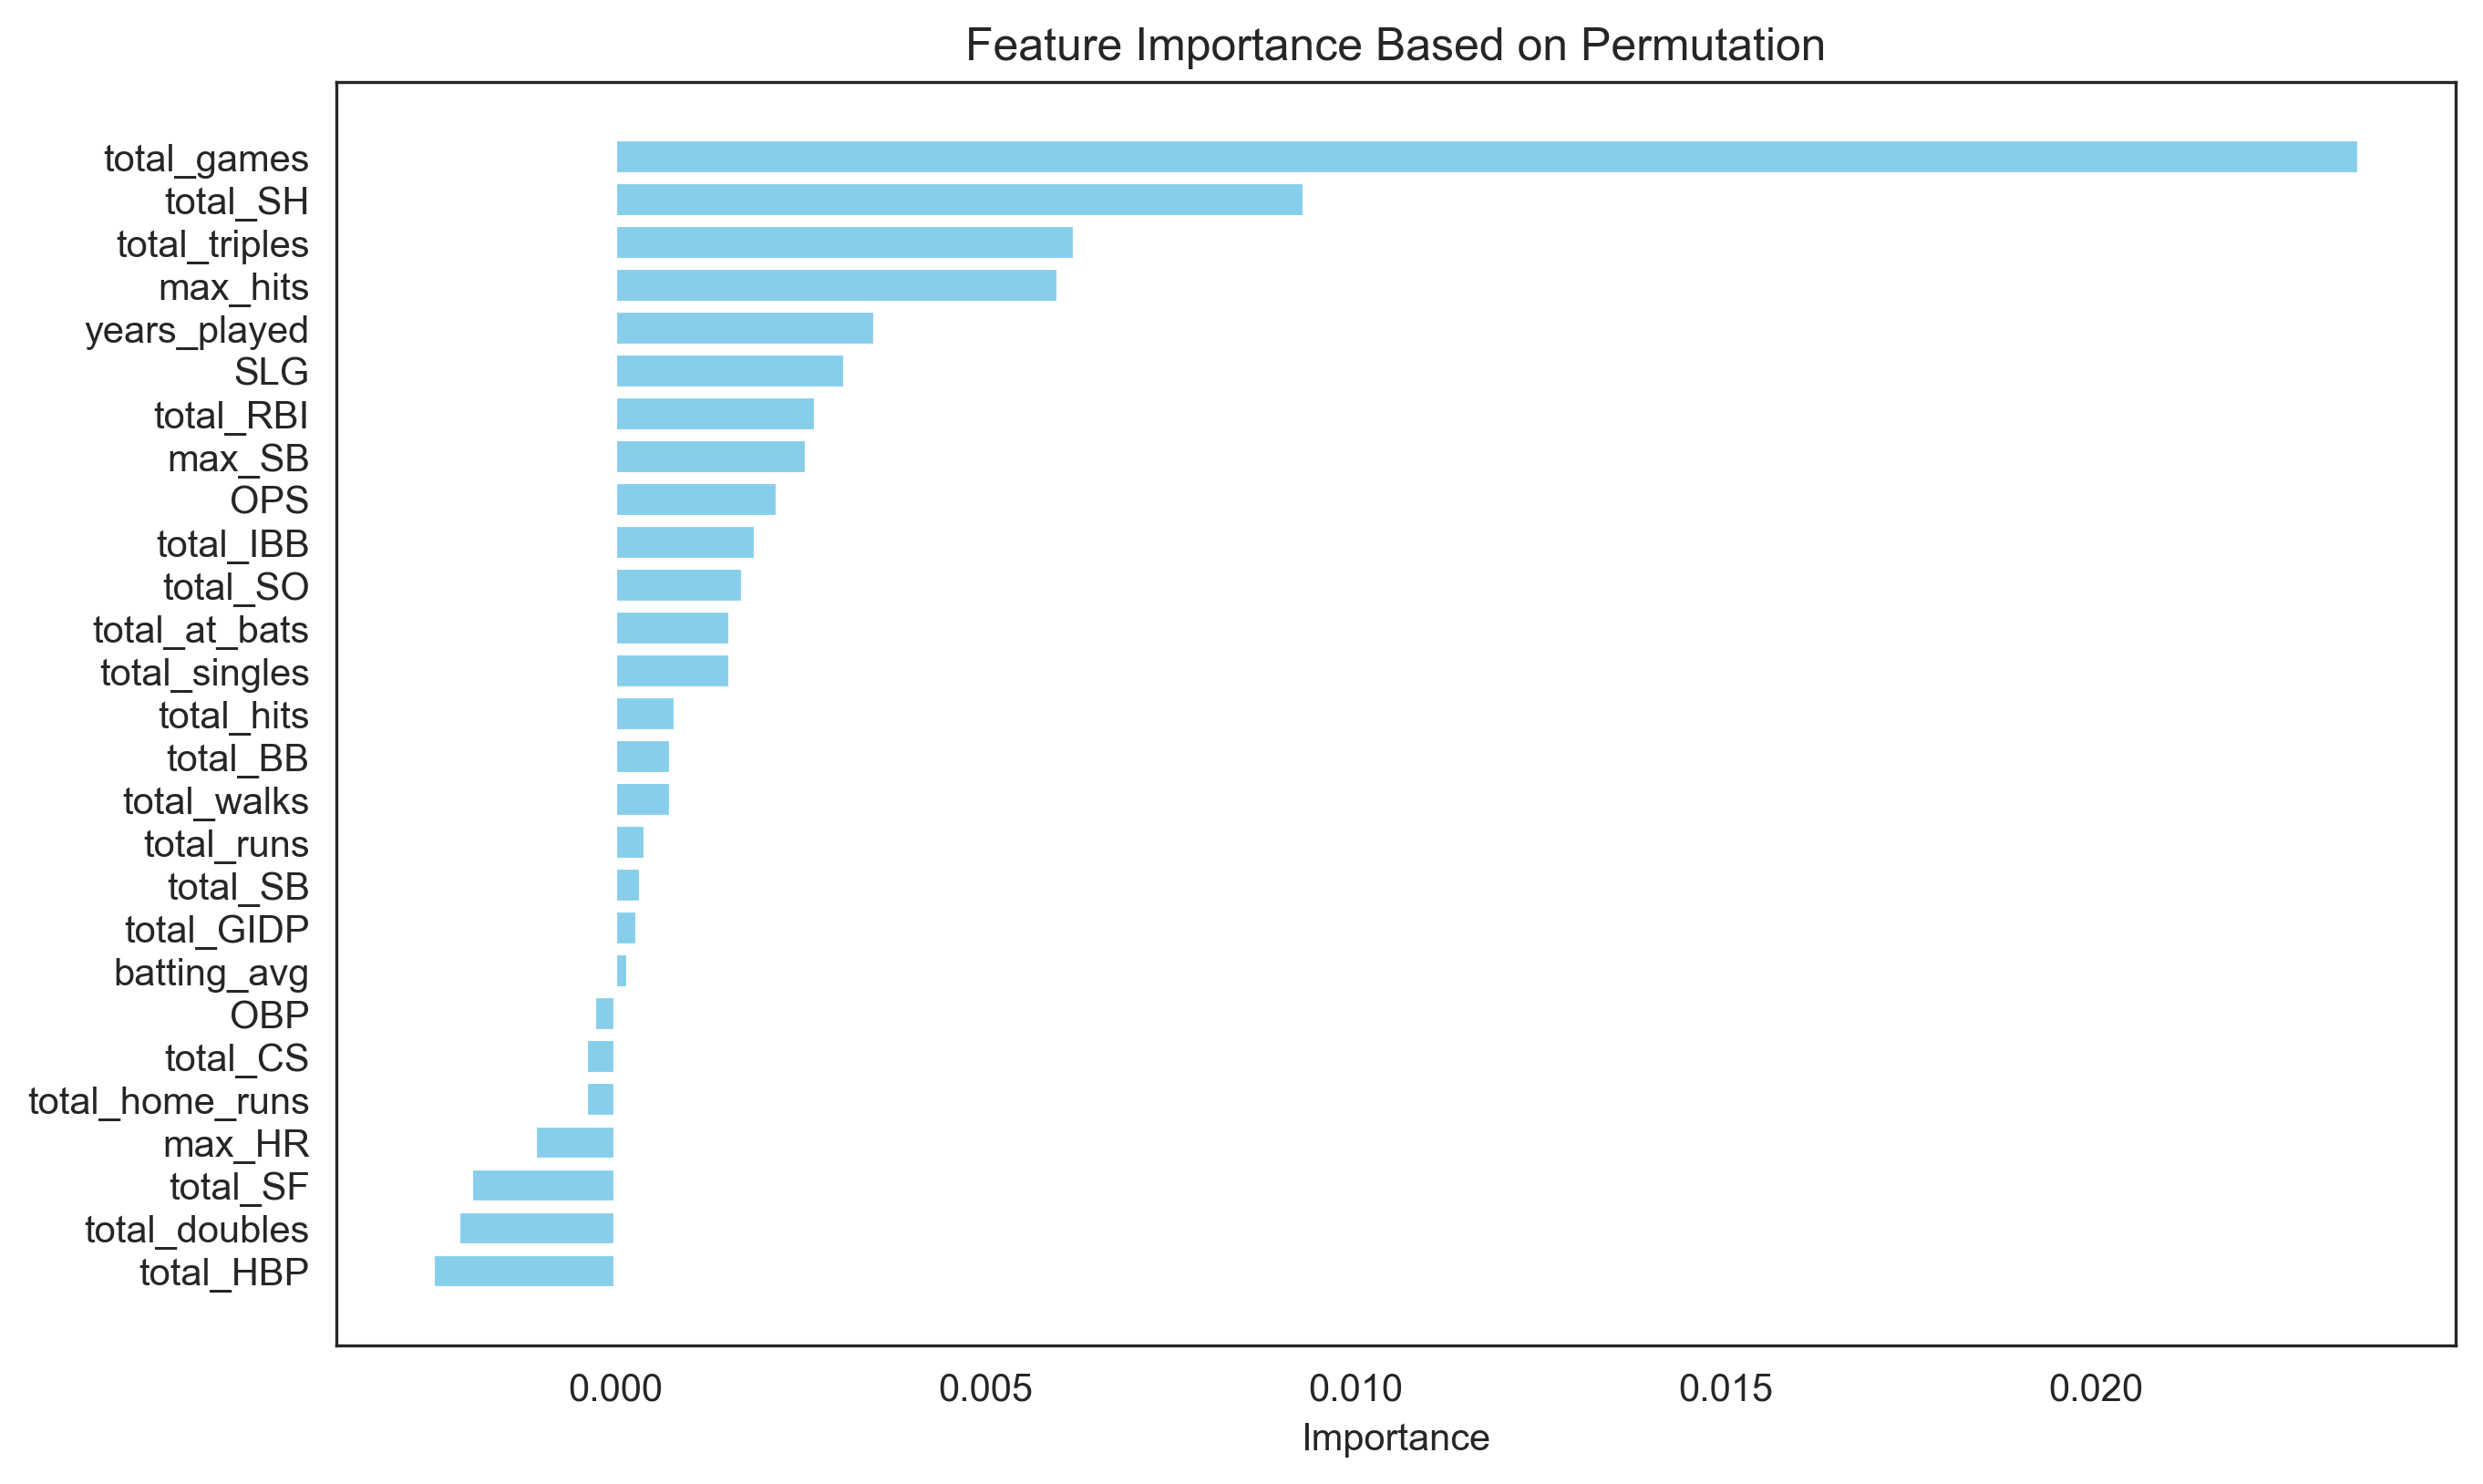

In [62]:

# Calculate feature importance using permutation importance
result = permutation_importance(svm_model_1, X_test_scaled, y_test, n_repeats=30, random_state=42)
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Permutation')
plt.gca().invert_yaxis()
plt.show()